In [481]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors



In [482]:
df1 = pd.read_csv('bubbleteaNY.csv') 
df1['search_city'] = 'New York'
df2 = pd.read_csv('bubbleteaLA.csv') 
df2['search_city'] = 'Los Angeles'
df3 = pd.read_csv('bubbleteaCHI.csv') 
df3['search_city'] = 'Chicago'
df4 = pd.read_csv('bubbleteaHOU.csv') 
df4['search_city'] = 'Houston'
df5 = pd.read_csv('bubbleteaPHX.csv') 
df5['search_city'] = 'Phoenix'
df6 = pd.read_csv('bubbleteaPHIL.csv') 
df6['search_city'] = 'Philadelphia'
df7 = pd.read_csv('bubbleteaSanAnt.csv') 
df7['search_city'] = 'San Antonio'
df8 = pd.read_csv('bubbleteaSD.csv') 
df8['search_city'] = 'San Diego'
df9 = pd.read_csv('bubbleteaDallas.csv') 
df9['search_city'] = 'Dallas'
df10 = pd.read_csv('bubbleteaSJ.csv') 
df10['search_city'] = 'San Jose'

bubbleteaTop10 = pd.concat([df1, df2, df3, df4, df5, df6, df7,
                           df8, df9, df10], sort=True)
col_order = ['search_city', 'business_name', 'rating','food_tags', 'first_review_date', 
       'last_review_date', 'review_num', 'address','city','state', 'street', 'zip5']

bubbleteaTop10 = bubbleteaTop10[col_order]
bubbleteaTop10.to_csv(r'bubbleteaTop10.csv',index=True)



In [497]:
cities = pd.read_csv('bubbleteaTop10.csv')
cities = cities.astype({'zip5': 'object'})
cities = cities.loc[:, ~cities.columns.str.contains('^Unnamed')]

# only with bubble tag and have at least 1 review

cities = cities[(cities.food_tags.str.contains('Bubble Tea')) &
               (cities.first_review_date != 0)]
# cities.dtypes


In [533]:
# add first revew year and month
cities['start_year'] = cities.first_review_date.str[-4:]
cities['start_month'] = cities.first_review_date.str.split('/', expand = True).iloc[:,0]

[Text(0,0.5,'Count of New Business'), Text(0.5,0,'Year')]

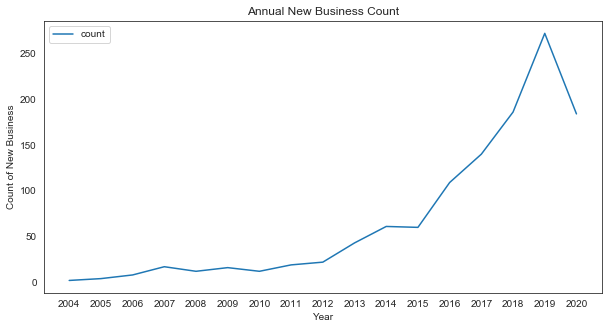

In [499]:
# new business count by year
year_cnt = cities.groupby('start_year')['business_name'].agg(['count'])
sns.set_style("white")
plt.figure(figsize=(10, 5))
new_biz = sns.lineplot(data=year_cnt)
plt.title('Annual New Business Count')
new_biz.set(xlabel='Year', ylabel='Count of New Business')

[Text(0,0.5,'Count of New Business'), Text(0.5,0,'Year')]

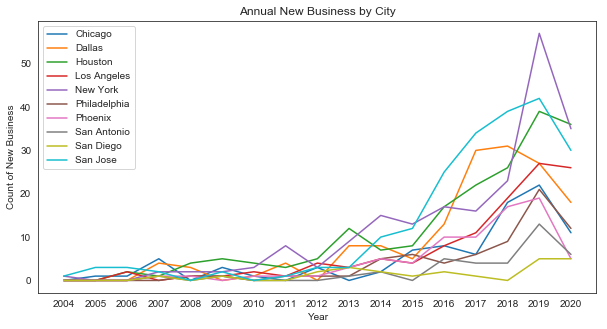

In [500]:
# new business count by year and city
year_cnt_city = cities.groupby(['start_year','search_city']).count()\
.business_name.unstack()
year_cnt_city = year_cnt_city.fillna(0)
# year_cnt_city.plot()
sns.set_style("white")
plt.figure(figsize=(10, 5))
year_city = sns.lineplot(data=year_cnt_city, dashes = False)
plt.title('Annual New Business by City')
year_city.set(xlabel='Year', ylabel='Count of New Business')



In [285]:
# growth rate
# year_cnt['Difference'] = year_cnt.diff()
year_cnt['Growth_Rate'] = year_cnt['Difference']/(year_cnt['count'].astype(float)-year_cnt['Difference'])
year_cnt

,count,Difference,Growth_Rate
start_year,,,
2004,2,NaN,NaN
2005,10,8.0,4.000000
2006,18,8.0,0.800000
2007,27,9.0,0.500000
2008,14,-13.0,-0.481481
2009,17,3.0,0.214286
2010,8,-9.0,-0.529412
2011,20,12.0,1.500000
2012,21,1.0,0.050000


In [282]:
year_cnt['Difference']/(year_cnt['count'].astype(float)-year_cnt['Difference'])

start_year
2004         NaN
2005    4.000000
2006    0.800000
2007    0.500000
2008   -0.481481
2009    0.214286
2010   -0.529412
2011    1.500000
2012    0.050000
2013    0.904762
2014    0.675000
2015    0.000000
2016    0.626866
2017    0.302752
2018    0.380282
2019    0.464286
2020   -0.282230
dtype: float64

In [295]:
#count word tags
str = "this is string example....wow!!!";

sub = "i";
print ("str.count(sub, 4, 40) : ", str.count(sub, 0, len(str)))
sub = "wow";
print ("str.count(sub) : ", str.count(sub))

str.count(sub, 4, 40) :  3
str.count(sub) :  1


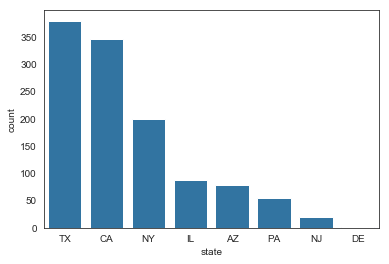

In [442]:
# Store count by state: skewed...
sns.countplot(x ='state',  data = cities, order = cities['state'].value_counts().index,
             color = "tab:blue") 
  
# Show the plot 
plt.show() 

In [503]:
zip_cnt = cities.groupby(['zip5']).count().business_name
zip_cnt = zip_cnt.reset_index(name='count') \
    .sort_values(['count'], ascending=False).head(20)
zip_cnt.dtypes

zip5     int64
count    int64
dtype: object

In [527]:
zip_cnt

,zip5,count
241,77036,20
479,95035,16
495,95122,16
26,10013,14
476,95014,13
259,77072,13
18,10003,12
187,75075,11
76,11354,10
58,11201,10


[Text(0,0.5,'Count of Business'), Text(0.5,0,'Zip Codes')]

<Figure size 720x360 with 0 Axes>

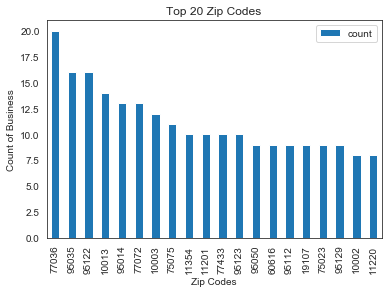

In [537]:
# count by zipcode
zip_cnt = cities.groupby(['zip5']).count().business_name
zip_cnt = zip_cnt.reset_index(name='count') \
    .sort_values(['count'], ascending=False).head(20)

plt.figure(figsize=(10, 5))
zip_count = zip_cnt.plot(x = 'zip5', y = 'count', kind ='bar', 
                         color = 'tab:blue')
#sns.set_style("white")
# year_city = sns.barplot(data=zip_cnt)
plt.title('Top 20 Zip Codes')
zip_count.set(xlabel='Zip Codes', ylabel='Count of Business')


In [534]:
# 77036: Houston's China town
# 95035: Milpitas
# 95122: East San Jose
# 10013: lower Manhattan
# 95014: Cupertino
# 77072: Houston area with a lot of Chinese restaurants
# 10003: Left part of East village
# 75075: Houston area with a lot of Chinese restaurants


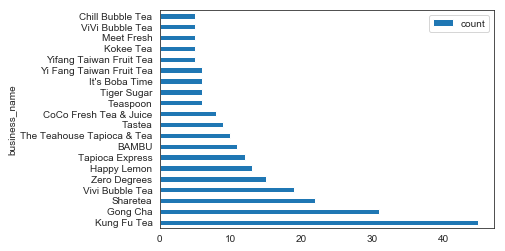

In [571]:
# business count:
business_cnt = cities.groupby(['business_name']).count().address
business_cnt = business_cnt.reset_index(name='count') \
    .sort_values(['count'], ascending=False)

biz_cnt = business_cnt.head(20).plot(x = 'business_name', y = 'count', kind ='barh', 
                         color = 'tab:blue')

In [600]:
# Top 10 businesses branches vs all: 16% of all stores
print(sum(business_cnt.head(10)['count']))
print(sum(business_cnt['count']))

sum(business_cnt.head(10)['count'])/sum(business_cnt['count'])


187
1200


0.15583333333333332

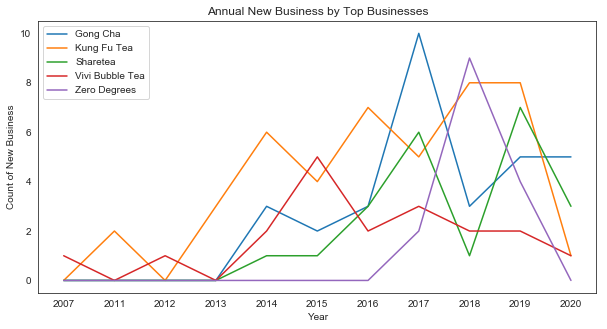

In [609]:
# looking into top 10 bubble tea branches
top_biz = business_cnt.business_name.head(5)

top_biz_info = cities[cities['business_name'].isin(top_biz)]
#[['business_name', 'rating', 'start_year']]
# top_biz_info.plot(x = 'start_year', y = 'business_name', kind ='scatter', 
#                          color = 'tab:blue')


biz_yr_cnt =  top_biz_info.groupby(['start_year','business_name']).count()\
.address.unstack()
biz_yr_cnt = biz_yr_cnt.fillna(0)
# year_cnt_city.plot()
sns.set_style("white")
plt.figure(figsize=(10, 5))
biz_yr_cnt = sns.lineplot(data=biz_yr_cnt, dashes = False)
plt.title('Annual New Business by Top Businesses')
biz_yr_cnt.set(xlabel='Year', ylabel='Count of New Business')
plt.show()



In [606]:
# rating of top business vs lower

top_biz = business_cnt.business_name.head(10)
top_biz_info = cities[cities['business_name'].isin(top_biz)]

lower_biz = business_cnt.business_name.tail(10)
lower_biz_info = cities[cities['business_name'].isin(lower_biz)]

top_rating = top_biz_info.groupby('business_name').mean()
lower_rating = lower_biz_info.groupby('business_name').mean()

print(top_rating)
print(lower_rating)


# observation: chains tend to have more reviews, 
# but average rating are not necessarily higher

                              rating  review_num
business_name                                   
BAMBU                       3.636364  198.090909
Gong Cha                    3.806452  157.677419
Happy Lemon                 4.000000  238.153846
Kung Fu Tea                 3.477273  170.181818
Sharetea                    3.772727  161.727273
Tapioca Express             3.083333  180.444444
Tastea                      4.000000  236.666667
The Teahouse Tapioca & Tea  3.700000  146.300000
Vivi Bubble Tea             3.578947  132.052632
Zero Degrees                3.266667  191.066667
                                       rating  review_num
business_name                                            
Hien Khanh                                4.0        96.0
High Tea House                            4.0        11.0
Hippies Brew                              4.0       178.0
Hitea                                     4.0         7.0
Ho Ho Té                                  4.0       107.0
Hoja B

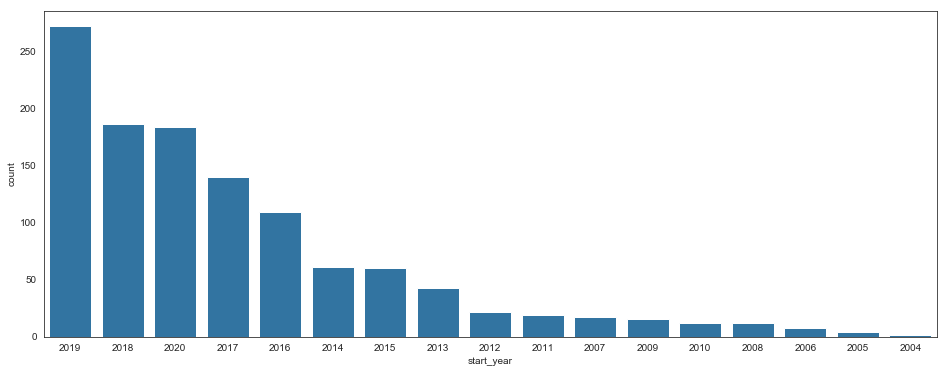

In [591]:
plt.figure(figsize=(16, 6))
sns.countplot(x = 'start_year', data = cities, order = cities['start_year'].value_counts().index, 
             color = 'tab:blue')
plt.show()
              

,business_name,rating,food_tags,first_review_date,last_review_date,review_num,address,city,state,street,zip5,start_year,start_month
0,Surreal Creamery,4.0,Ice Cream & Frozen Yogurt/Bubble Tea,6/6/2020,10/24/2020,115.0,"538 2nd Ave,New York, NY 10016",New York,NY,538 2nd Ave,10016,2020,6
1,Creep City Ninja Bubble Tea,3.0,Bubble Tea/Vietnamese/Venues & Event Spaces,6/17/2018,7/25/2020,27.0,"265 Graham Ave,Store Front,Brooklyn, NY 11206",Brooklyn,NY,265 Graham Ave,11206,2018,17
2,Namas Tea,5.0,Coffee & Tea/Bubble Tea/Venues & Event Spaces,6/28/2019,9/1/2020,19.0,"863 Sterling Pl,Brooklyn, NY 11216",Brooklyn,NY,863 Sterling Pl,11216,2019,28
3,Coco Fresh Tea & Juice,3.0,Bubble Tea,3/1/2013,10/24/2020,64.0,"86-55 Broadway,Elmhurst, NY 11373",Elmhurst,NY,86-55 Broadway,11373,2013,1
4,Hawa smoothie & Bubble tea,5.0,Bubble Tea/Juice Bars & Smoothies,10/29/2019,9/18/2020,8.0,"1151 2nd Ave,New York, NY 10065",New York,NY,1151 2nd Ave,10065,2019,29
